In [1]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# !unzip data.zip

In [21]:
import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-14 19:02:27.741096: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
#@ INSPECTION:
import tensorflow
tensorflow.__version__

'2.4.1'

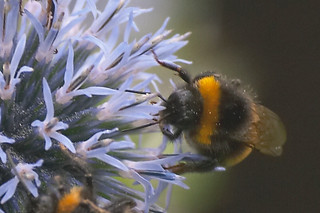

In [5]:
path = './data/train/bee'
name = '254129708_4e36983632_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [7]:
train_dir = 'data/train'
test_dir = 'data/test'

## Question 1
Since we have a binary classification problem, what is the best loss function for us?
- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`


In [8]:
#@ INITIALIZING MODEL CREATION:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-11-14 19:02:30.398768: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-14 19:02:30.405628: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-14 19:02:30.444979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-14 19:02:30.445460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 327.88GiB/s
2023-11-14 19:02:30.445493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-11-14 19:02:30.558573: I tensorflow/stream_executor/platform/de

In [9]:
#@ COMPILING THE MODEL:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

## Question 2
What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.
- 1
- 65
- 896
- 11214912


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


## Generators and Training
For the next two questions, use the following data generator for both train and test sets:
```
ImageDataGenerator(rescale=1./255)
```
- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
- Use `batch_size=20`
- Use `shuffle=True` for both training and test sets.

For training use `.fit()` with the following params:
```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```


## Question 3

What is the median of training accuracy for all the epochs for this model?
- 0.20
- 0.40
- 0.60
- 0.80

In [11]:
#@ INITIALIZING IMAGE DATAGENERATOR:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#@ TRAINING DATAGENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [13]:
#@ VALIDATION DATAGENERATOR:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 918 images belonging to 2 classes.


In [14]:
#@ INSPECTING:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

2023-11-14 19:03:26.682170: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-14 19:03:26.684839: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/10
184/184 [==============================] - 20s 104ms/step - loss: 0.6832 - acc: 0.5718 - val_loss: 0.6184 - val_acc: 0.6460
Epoch 2/10
184/184 [==============================] - 18s 99ms/step - loss: 0.6316 - acc: 0.6272 - val_loss: 0.6385 - val_acc: 0.5871
Epoch 3/10
184/184 [==============================] - 18s 98ms/step - loss: 0.5857 - acc: 0.6917 - val_loss: 0.5439 - val_acc: 0.7364
Epoch 4/10
184/184 [==============================] - 19s 103ms/step - loss: 0.5357 - acc: 0.7390 - val_loss: 0.5495 - val_acc: 0.7440
Epoch 5/10
184/184 [==============================] - 18s 98ms/step - loss: 0.5132 - acc: 0.7595 - val_loss: 0.5143 - val_acc: 0.7723
Epoch 6/10
184/184 [==============================] - 18s 98ms/step - loss: 0.4851 - acc: 0.7757 - val_loss: 0.4943 - val_acc: 0.7702
Epoch 7/10
184/184 [==============================] - 18s 99ms/step - loss: 0.4462 - acc: 0.8089 - val_loss: 0.4859 - val_acc: 0.7723
Epoch 8/10
184/184 [==============================] - 19s 10

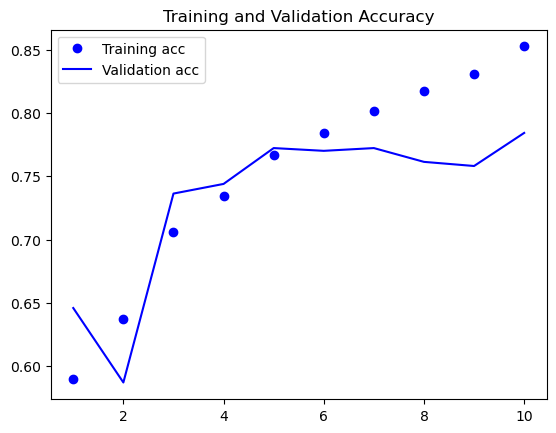

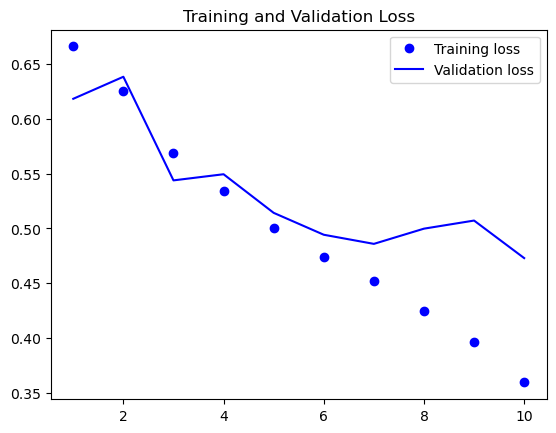

In [16]:
#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [17]:
#@ MEDIAN OF ACCURACY:
acc_median = np.median(acc)
acc_median

0.7757683098316193

## Question 4

What is the standard deviation of training loss for all the epochs for this model?
- 0.031
- 0.061
- 0.091
- 0.131

In [18]:
#@ STANDARD DEVIATION OF LOSS:
loss_std = np.std(loss)
loss_std

0.0941024023236382

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:
- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

## Question 5

Let's train our model for 10 more epochs using the same code as previously.

> Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?
- 0.18
- 0.48
- 0.78
- 0.108

In [19]:
#@ INITIALIZING DATA AUGMENTATION:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

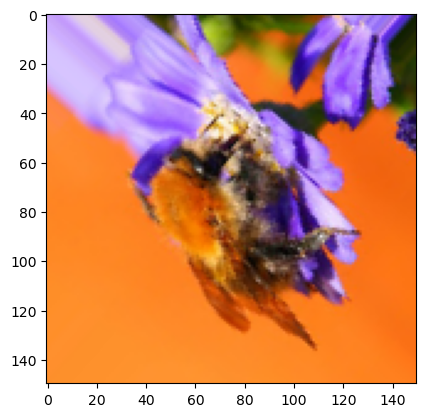

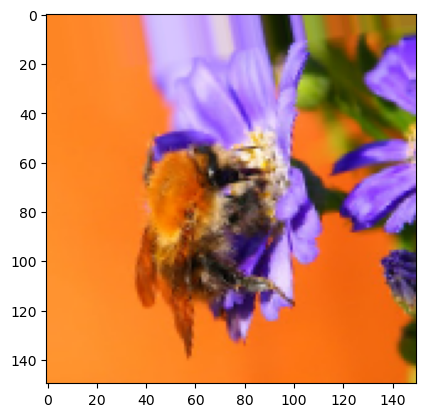

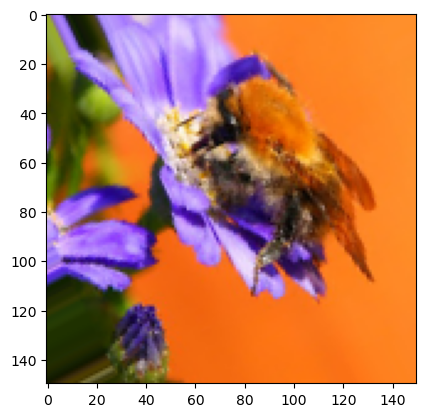

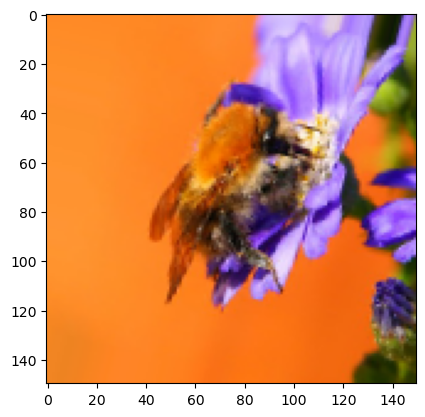

In [23]:
#@ INSPECTION:
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [25]:
#@ TRAINING DATA GENERATOR:
train_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255)

In [26]:
#@ TEST DATA GENERATOR:
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
#@ INITIALIZING DATA GENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [28]:
#@ INITIALIZING DATA GENERATOR:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 918 images belonging to 2 classes.


In [29]:
#@ MODEL TRAINING WITH AUGMENTATION:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4936 - acc: 0.7642 - val_loss: 0.5501 - val_acc: 0.7418
Epoch 2/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4936 - acc: 0.7732 - val_loss: 0.4621 - val_acc: 0.7985
Epoch 3/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4873 - acc: 0.7762 - val_loss: 0.4746 - val_acc: 0.7843
Epoch 4/10
184/184 [==============================] - 30s 163ms/step - loss: 0.4818 - acc: 0.7824 - val_loss: 0.4863 - val_acc: 0.7810
Epoch 5/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4725 - acc: 0.7824 - val_loss: 0.4653 - val_acc: 0.7887
Epoch 6/10
184/184 [==============================] - 30s 162ms/step - loss: 0.4619 - acc: 0.7884 - val_loss: 0.4694 - val_acc: 0.7854
Epoch 7/10
184/184 [==============================] - 29s 160ms/step - loss: 0.4636 - acc: 0.7846 - val_loss: 0.4665 - val_acc: 0.7887
Epoch 8/10
184/184 [==============================] - 2

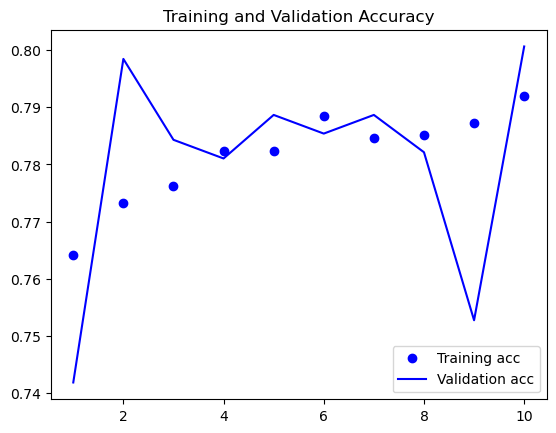

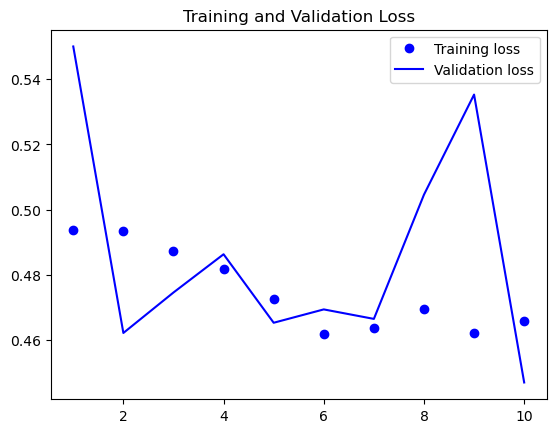

In [30]:
#@ INSPECTION ACCURACY AND LOSS:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [32]:
#@ MEAN OF VALIDATION LOSS:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.4861117869615555

In [33]:
#@ INSPECTION:
val_acc_aug[5:10]

[0.7854030728340149,
 0.7886710166931152,
 0.7821350693702698,
 0.7527233362197876,
 0.8006535768508911]

In [34]:
#@ MEAN OF ACCURACY:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7819172143936157